# 8. 🦄 가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리

-----
### 학습 목표
* 특징이 있는 데이터셋을 깊게 탐구
* 그래프 시각화, 피벗 테이블 등을 활용하여 EDA 진행
* 전처리 진행
* 데이터를 train/test로 나누고 분류모델 선택하여 학습하고 기존과 비교

----

## 8-2. 안녕, 포켓몬과 인사해!

**탐색적 데이터 분석(Exploratory Data Analysis, 이하 EDA) **

포켓몬 데이터 [\[캐글\]Pokemon with stats](https://www.kaggle.com/abcsds/pokemon)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
csv_path = "/content/drive/MyDrive/Aiffel_Nodes/data_preprocess/Pokemon.csv"
original_data = pd.read_csv(csv_path)

# 원본 데이터를 보존 해두고 사용용
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
# 전설의 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 8-5. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (1) 결측치와 전체 칼럼

결측치 확인인

In [7]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## 8-6. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (2) ID와 이름

In [ ]:
print("포켓몬의 ID 개수 : ",len(set(pokemon["#"])))
print("포켓몬의 이름 개수",len(set(pokemon['Name'])))

print("ID가 6인 포켓몬들")
pokemon[pokemon["#"] == 6]

포켓몬의 ID 개수 :  721
포켓몬의 이름 개수 800
ID가 6인 포켓몬들


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [8]:
# Type1, Type2의 개수
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [9]:
# Type2의 개수가 하나더 많은 이유는 {없다}라는 데이터가 추가되어 있다.
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [10]:
types = list(set(pokemon["Type 1"]))
types

['Steel',
 'Dragon',
 'Normal',
 'Water',
 'Dark',
 'Electric',
 'Psychic',
 'Bug',
 'Flying',
 'Rock',
 'Fairy',
 'Ice',
 'Poison',
 'Ground',
 'Fire',
 'Ghost',
 'Grass',
 'Fighting']

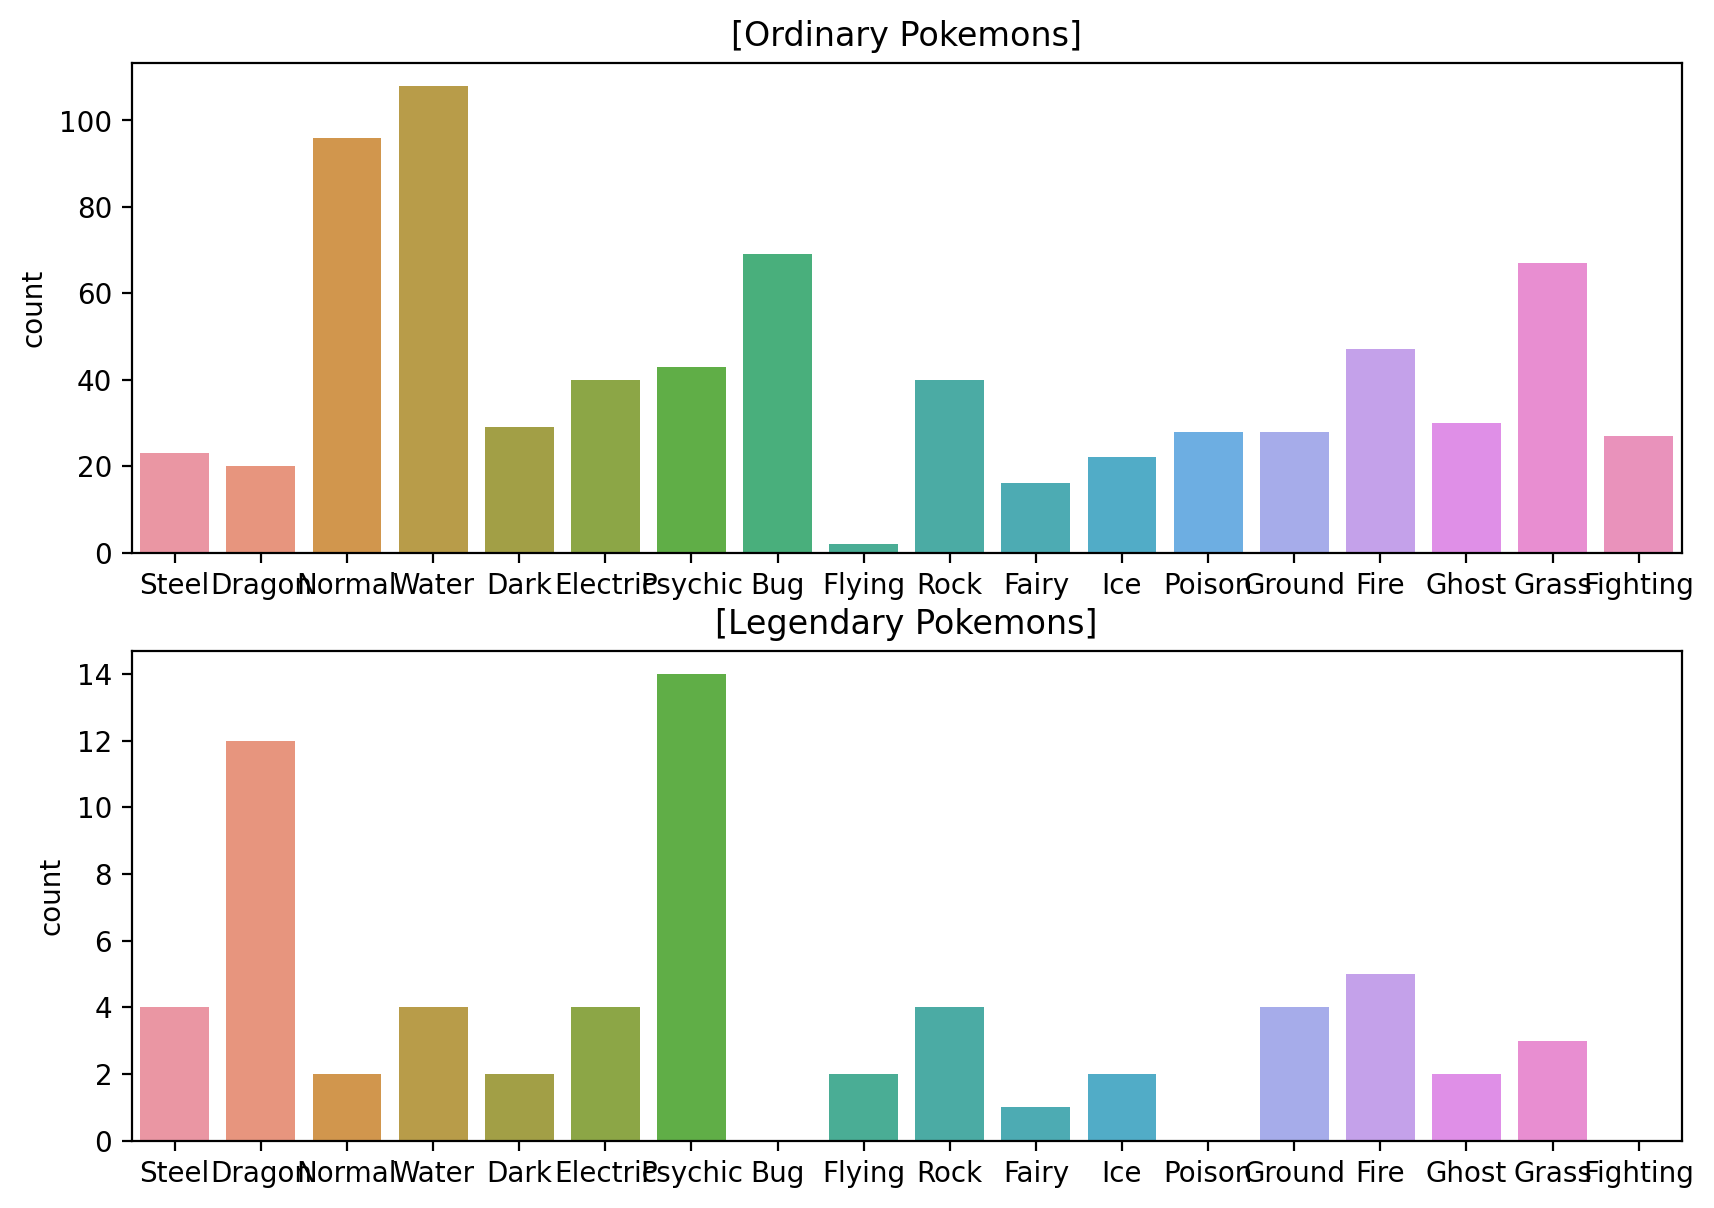

In [11]:
# 전설과 일반 포켓몬 시각화화
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [12]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


## 8-9. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (5) 세부 스탯



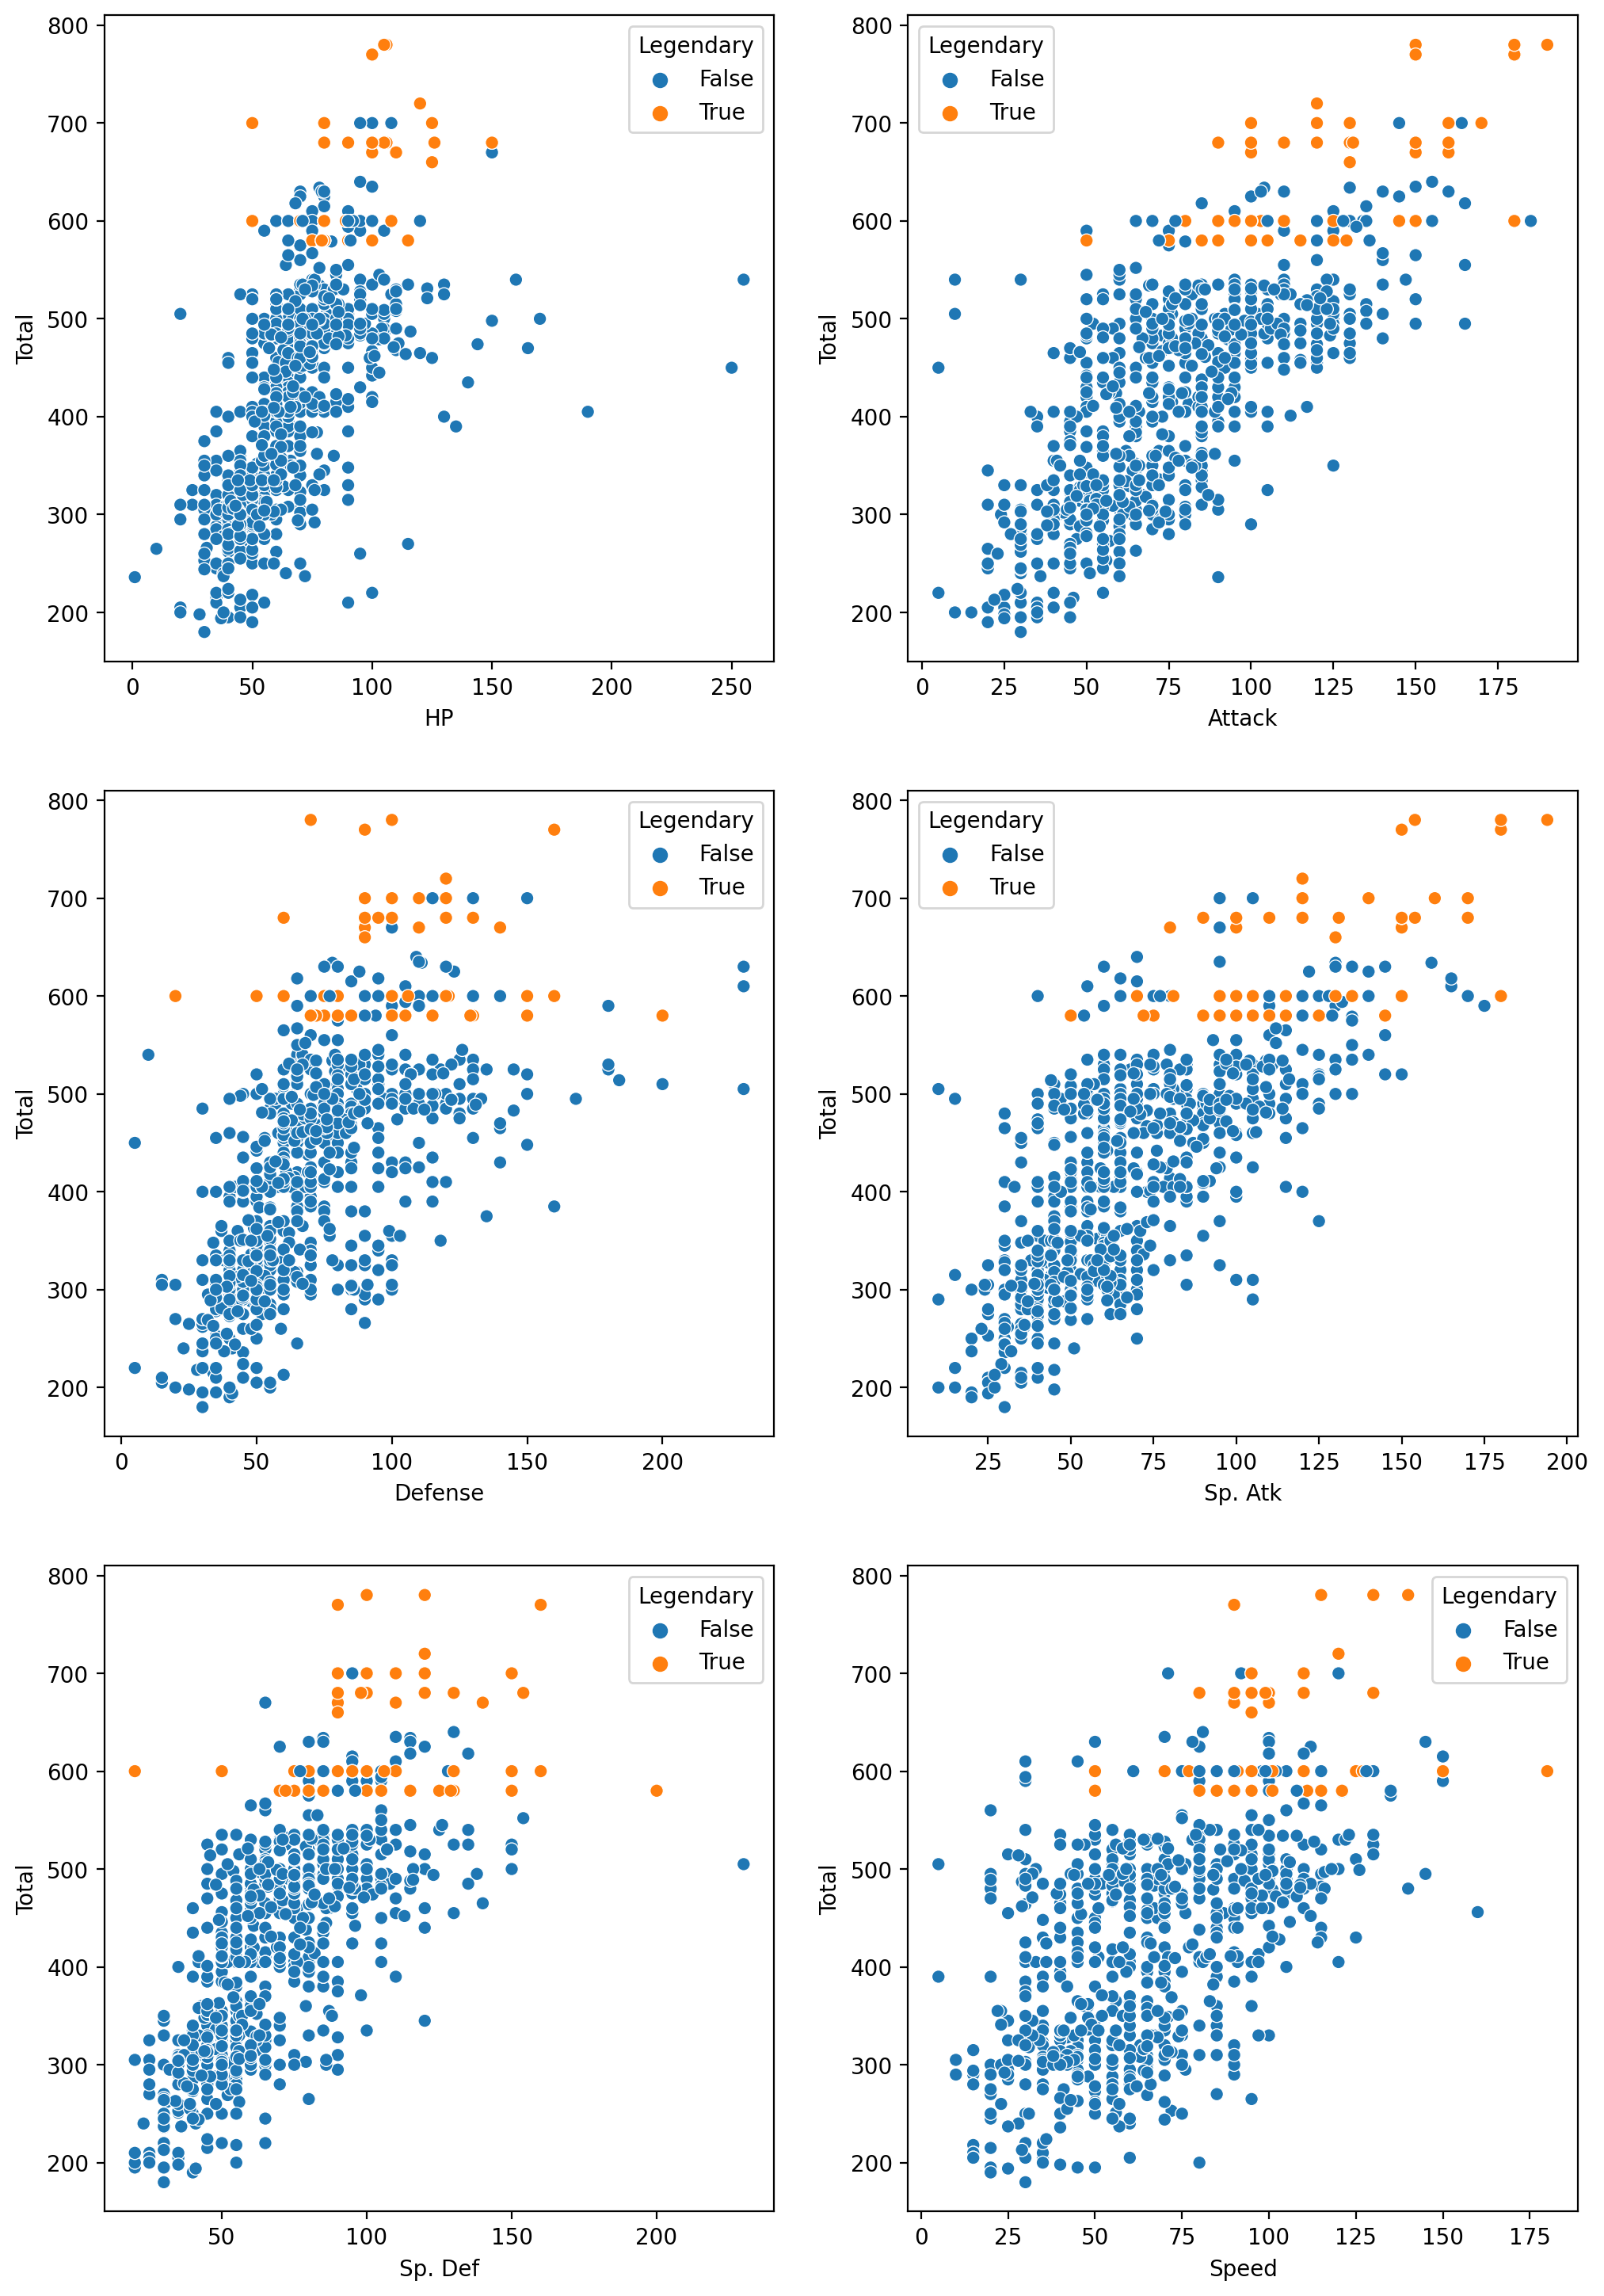

In [13]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary",ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary",ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary",ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary",ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary",ax=ax6)
plt.show()

## 8-12. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름

In [14]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [16]:
# Name의 길이를 나타내는 컬럼을 추가..
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))   

legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


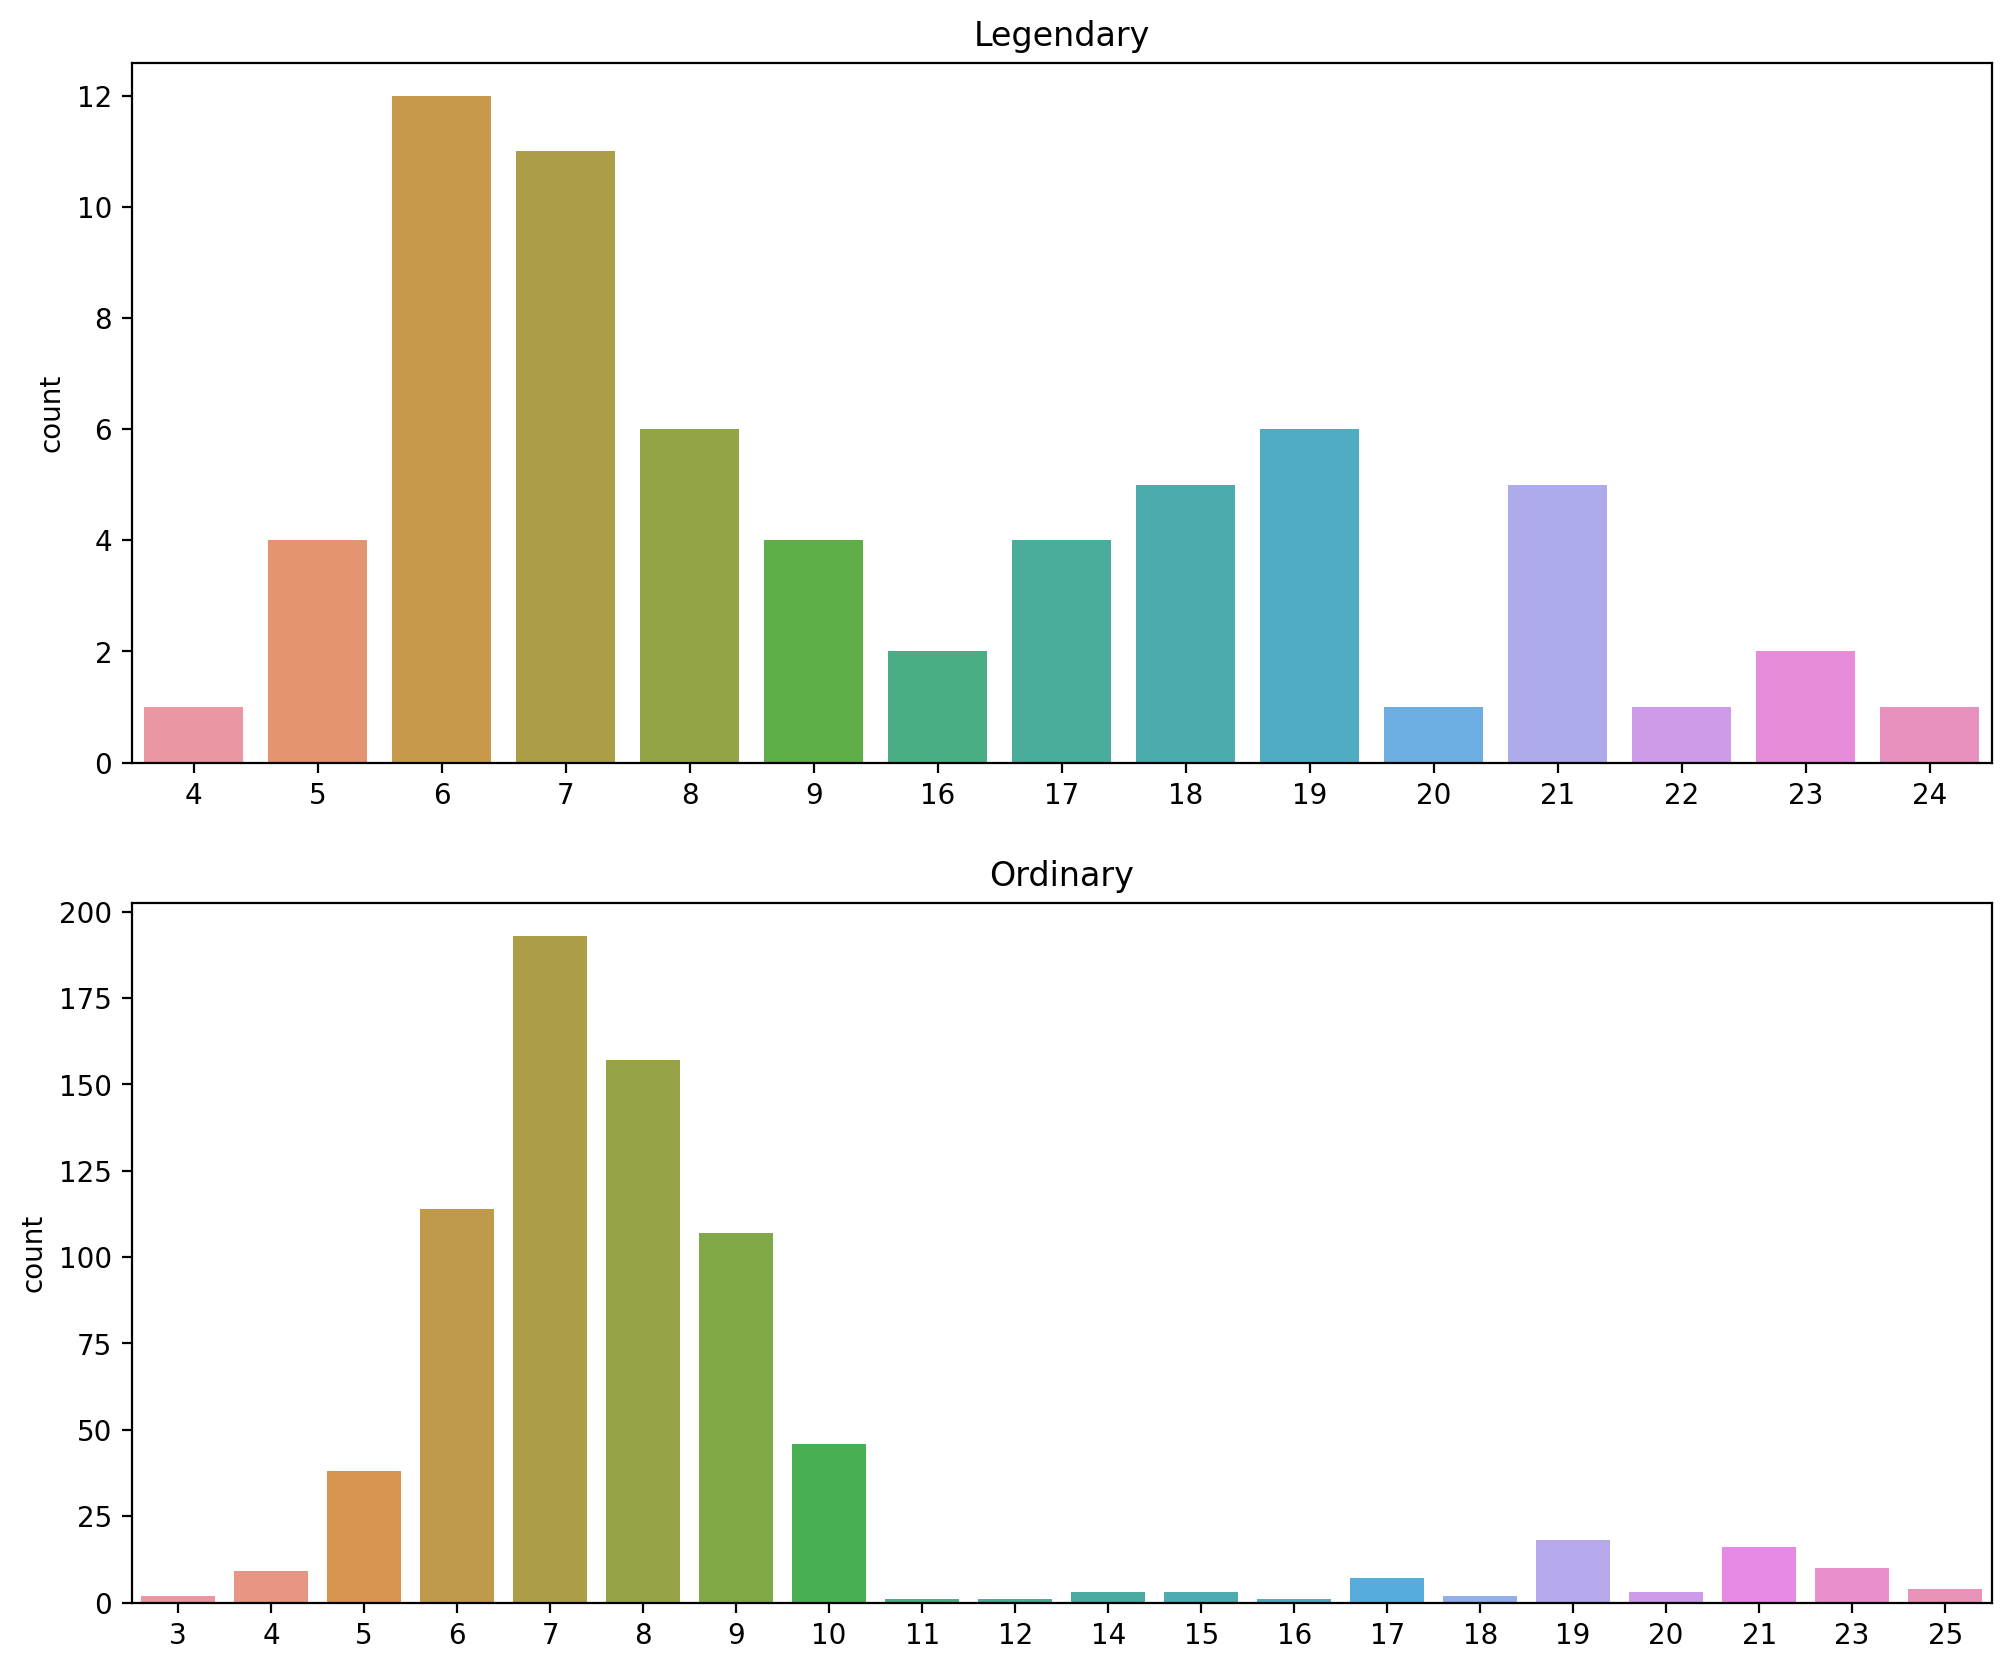

In [17]:
# name_count 컬럼의 특징
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [ ]:
# 전체 데이터의 이름의 길이 컬럼과 이름의 길이기 10이 넘으면 True를 가지는 불리언 컬럼 추가
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon["long_name"] = pokemon["name_count"] >= 10

pokemon.head()

## 8-14. 모델에 넣기 위해! 데이터 전처리하기 (2) 이름에 자주 쓰이는 토큰 추출

포켓몬의 이름에 많이 쓰이는 토큰(단어?텍스트를 나누는 단위?)를 찾기 위해 분석해보자!

포켓몬 데이터의 이름은 총 네가지로 분류된다.
1. 한 단어면 `ex. Venusaur`
2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 `ex. VenusaurMega Venusaur`
3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 `ex. CharizardMega Charizard X`
4. 알파벳이 아닌 문자를 포함하는 경우 `ex. Zygarde50% Forme`

##### isalpha() 이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기





In [18]:
s1 = pd.Series(['one', 'one1', '1', ''])
s1.str.isalpha()



0     True
1    False
2    False
3    False
dtype: bool

In [25]:
# 이름의 띄어쓰기를 없앤 컬럼 추가
pokemon["name_nospace"] = pokemon["Name"].apply(lambda i:i.replace(" ",""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Diancie,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,DiancieMegaDiancie,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,HoopaHoopaConfined,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,HoopaHoopaUnbound,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,Volcanion,Volcanion


In [26]:
# isalpha()를 이용해서 이름이 알파벳으로만 이루어져 있는지 확인
pokemon["name_isalpha"] = pokemon["name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Bulbasaur,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Ivysaur,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Venusaur,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,VenusaurMegaVenusaur,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Charmander,Charmander,True


In [29]:
# 이름에 알파벳이 아닌 다른 문자가 들어간 데이터를 확인해 보자.
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 16)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,Nidoran♀,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,Nidoran♂,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,Farfetch'd,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,Mr.Mime,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,Porygon2,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Ho-oh,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,MimeJr.,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,Porygon-Z,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,Zygarde50%Forme,Zygarde50%Forme,False


In [30]:
# 확인된 이름들을 알파벳으로 변경하기 위해 .replace(to_replace="변경 전", value="변경 후")
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr.Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="MimeJr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50%Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,Nidoran X,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,Nidoran Y,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,Farfetchd,Farfetchd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,Mr Mime,Mr Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,Porygon,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Ho Oh,Ho Oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,Mime Jr,Mime Jr,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,Porygon Z,Porygon Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,Zygarde Forme,Zygarde Forme,False


In [31]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_nospace,name_isalpha
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,Mr.Mime,Mr Mime,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,MimeJr.,Mime Jr,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,Zygarde50%Forme,Zygarde Forme,False


In [33]:
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_nospace,name_isalpha


### 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기 **정규표현식(RegEx: Regular Expression)**




In [36]:
import re
name = "CharizardMega Charizard X"
name_split = name.split(" ")
temp = name_split[0]
# '[A-Z][a-z]*'는 [A-Z]대문자로 시작,[a-z]소문자가 오는데 소문자가 *반복복
tokens = re.findall('[A-Z][a-z]*', temp)
print(name_split,tokens)

['CharizardMega', 'Charizard', 'X'] ['Charizard', 'Mega']


In [37]:
# 토큰화 하는 함수 만들어 보기기
def tokenize(name):
    tokens = []
    n_split = name.split(" ")
    for p_name in n_split:
        t_name = re.findall('[A-Z][a-z]*',p_name)
        tokens.extend(t_name)
    return np.array(tokens)

In [38]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [41]:
from collections import Counter
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [42]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


## 8-15. 모델에 넣기 위해! 데이터 전처리하기 (3) Type1 & 2! 범주형 데이터 전처리하기

다음과 같이 전처리 진행

* 18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.
* 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.



In [43]:
print(types)

['Steel', 'Dragon', 'Normal', 'Water', 'Dark', 'Electric', 'Psychic', 'Bug', 'Flying', 'Rock', 'Fairy', 'Ice', 'Poison', 'Ground', 'Fire', 'Ghost', 'Grass', 'Fighting']


In [54]:
# 원-핫 인코딩
for t in types:
  pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[["Type 1","Type 2"]+types].head(10)

,Type 1,Type 2,Steel,Dragon,Normal,Water,Dark,Electric,Psychic,Bug,Flying,Rock,Fairy,Ice,Poison,Ground,Fire,Ghost,Grass,Fighting
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6,Fire,Flying,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
7,Fire,Dragon,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8,Fire,Flying,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
9,Water,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 8-16. 가랏, 몬스터볼! (1) 가장 기본 데이터로 만드는 베이스라인



In [55]:
# 원본 데이터 불러오기
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [57]:
# 인덱스인 `#`와 문자열 데이터인 Name, Type 1, Type 2데이터는 제외하고 
# Target데이터인 Lagendary도 빼준다.
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

In [60]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
print(X.head())

print("-------------------------------------------")
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
print(y.head())

(800, 8)
   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0    318  45      49       49       65       65     45           1
1    405  60      62       63       80       80     60           1
2    525  80      82       83      100      100     80           1
3    625  80     100      123      122      120     80           1
4    309  39      52       43       60       50     65           1
-------------------------------------------
(800,)
0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


## 8-17. 가랏, 몬스터볼! (2) 의사 결정 트리 모델 학습시키기

의사 결정 트리를 사용


In [62]:
from sklearn.tree import DecisionTreeClassifier

# 모델 준비
model = DecisionTreeClassifier(random_state=25)
# 모델을 학습하고 예측한다.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### **Confusion Matrix**

우리의 데이터에서는 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)를 나타냅니다.

즉, 위 수치를 해석해 보면 다음과 같죠.

* TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
* FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
* FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
* TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

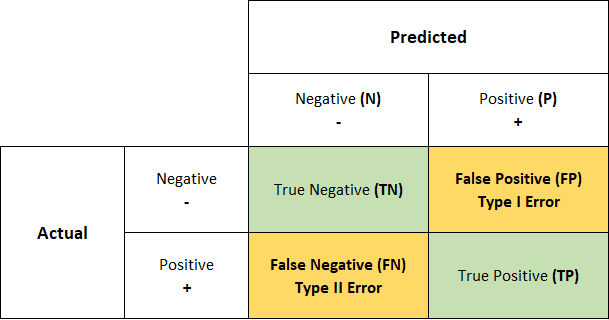

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



## 8-18. 가랏, 몬스터볼! (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?


In [65]:
print(len(pokemon.columns))
print(pokemon.columns)

44
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'Name_nospace', 'name_nospace', 'name_isalpha', 'Forme', 'Mega',
       'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre',
       'Groudon', 'Steel', 'Dragon', 'Normal', 'Water', 'Dark', 'Electric',
       'Psychic', 'Bug', 'Flying', 'Rock', 'Fairy', 'Ice', 'Poison', 'Ground',
       'Fire', 'Ghost', 'Grass', 'Fighting'],
      dtype='object')


In [68]:
target = "Legendary"
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

X = pokemon[features]
print(X.shape)
print(X)

print("------------------------------")

y = pokemon[target]
print(y.shape)
print(y)

KeyError: ignored